# **Group Assignment** - Bike Sharing

The administration of Washington D.C wants to make a deeper analysis of the usage of the bike-sharing service present in the city in order to build a predictor model that helps the public transport department anticipate better the provisioning of bikes in the city. For these purposes, some data is available for the years 2011 and 2012.



# Main goals
As part of the team of the hired consultancy firm, your work is to build an interactive, insightful and complete report about the bike-sharing service in the city for the head of transportation services of the local government. As part of the requirements, there are two big points:



1. The customer wants a deep analysis of the bike-sharing service. He wants to know how the citizens are using the service in order to know if some changes must be made to optimize costs or provide a better service.
2. The customer also wants a predictive model able to predict the total number of bicycle users on an hourly basis. They believe this will help them in the optimization of bike provisioning and will optimize the costs incurred from the outsourcing transportation company.


# Grading criteria


#### Data Analysis (descriptive analytics) (3 points)
- Ensuring data quality (correctness, consistency, missing values, outliers...).
- Plotting clear and meaningful figures.
- Giving insights on what seems relevant for prediction and what does not.
- Discussion on missing values and outliers
- Treatment of text and date features
- Generation of extra features (e.g., season, yes/no holiday, hours of daylight, combinations of features, quantization/binarization, polynomial features)
- Provide useful explanations about the decisions taken and the results obtained
##### NOTES:
- There's no limit to the number of figures or insights to extract, but the quality will count more than the quantity. 


#### Machine Learning (predictive analytics) (3 points)
- Choosing the best model to solve the problem (linear and non-linear).
- Split data correctly to train and test your models
- Tuning model parameters with validation
- Obtaining accurate predictions in tests
- Plotting predictions vs. reality for additional insights
- Deep analysis of results and insights given the features
- Provide explanations about the decisions taken (chosen model, hyperparameter settings, evaluation metric employed, etc.)
##### NOTES:
- Limit the libraries to those seen in class: sklearn, xgboost, lightgbm, catboost, pandas, etc
- This model will not be evaluated just by the score obtained


#### Interactive report with Streamlit (4 points)
Requirement: Use Streamlit (https://streamlit.io/)
- Include all knowledge from the previous points in a unified tool that comprises all knowledge about data and satisfies the requirements of the customer.
- Try to use headers and subheaders to separate the different parts of your work
- Use separate sections to tell your story with cohesion. Missings, creation of new variables, exploratory data analysis, modeling, and recommendations about the actions to take by the results.
- Include Plotly graphs to show your insights but also to show the analysis of the results of your models.
- Include some kind of interactivity to your graphs by including text boxes, sliders, and any kind of input type element in Streamlit.
##### NOTES:
To include graphics, data, and the results of the model you can export all elements you need from the notebook (in CSV, json, or any other format) and then read it again in the dashboard script.


These grading criteria contain just some points to take into account. The final grading will take into account more things like programming style, cleanliness, the correct use of pandas and other libraries (without redundant code), and the creativity of the group to provide an original solution that solves the business problem. Use your creativity and your already-acquired knowledge of engineering, machine learning, plotting, and programming to build a sophisticated tool for the local government department.



# Submission


1. Jupyter Notebook with all code developed for this assignment. This includes all exploratory data analysis and machine learning models. Name: Group<groupname>_Notebook_Assignment2.ipynb
2. Python script that launches the streamlit dashboard. Name: Group<groupname>_StreamlitSrc_Assigment2.py
This script must be ready to be executed with the command streamlit run <yourscriptname> without errors.

# Variables

- `instant`: record index
- `dteday` : date
- `season` : season 1:winter, 2:spring, 3:summer, 4:fall
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

In [2]:
# Import all the necessary packages
# Standard libraries
import numpy as np
import pandas as pd
import pickle

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine learning and modeling
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

# Time-series analysis
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Astronomy (for sunrise and sunset calculations)
from astral import LocationInfo
from astral.sun import sunrise, sunset

## PART I: Exploratory Data Analysis

##### Part 1.1 Description of the columns

In [3]:
# Load the dataset
df = pd.read_csv('bike-sharing-hourly.csv')
random_state = 42

# Display the first few rows
print("Data Preview:")
print(df.head().to_string())

Data Preview:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp   atemp   hum  windspeed  casual  registered  cnt
0        1  2011-01-01       1   0     1   0        0        6           0           1  0.24  0.2879  0.81        0.0       3          13   16
1        2  2011-01-01       1   0     1   1        0        6           0           1  0.22  0.2727  0.80        0.0       8          32   40
2        3  2011-01-01       1   0     1   2        0        6           0           1  0.22  0.2727  0.80        0.0       5          27   32
3        4  2011-01-01       1   0     1   3        0        6           0           1  0.24  0.2879  0.75        0.0       3          10   13
4        5  2011-01-01       1   0     1   4        0        6           0           1  0.24  0.2879  0.75        0.0       0           1    1


In [4]:
# Check for missing values and datatypes

print("\nMissing Values and Data Types:")
print(df.info(show_counts=True))
# all data seems to be of the right type except dtedate which should be datetime
# Also since NaNs are 0, and the types are numerical, we have no missing data. at least that's our best guess at the moment


Missing Values and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [5]:
# we convert dteday to datetime
# Create a new datetime column that combines date and hour
df['dteday'] = pd.to_datetime(df['dteday'])
df['datetime'] = df['dteday'] + pd.to_timedelta(df['hr'], unit='h')
# Extract day, week for visualizations
df['day'] = df['dteday'].dt.day
df['week'] = df['dteday'].dt.isocalendar().week

In [6]:
# Describe dataset for a quick summary
print("\nDataset Summary:")
print(df.describe())

# Something wrong with the windspeed column, max should be 1 since we normalized by max


Dataset Summary:
          instant                         dteday        season            yr  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      2.501640      0.502561   
min        1.0000            2011-01-01 00:00:00      1.000000      0.000000   
25%     4345.5000            2011-07-04 00:00:00      2.000000      0.000000   
50%     8690.0000            2012-01-02 00:00:00      3.000000      1.000000   
75%    13034.5000            2012-07-02 00:00:00      3.000000      1.000000   
max    17379.0000            2012-12-31 00:00:00      4.000000      1.000000   
std     5017.0295                            NaN      1.106918      0.500008   

               mnth            hr       holiday       weekday    workingday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       6.537775     11.546752      0.028770      3.003683      0.682721   
min        1.000000     

##### Part 1.2 correlation of the columns

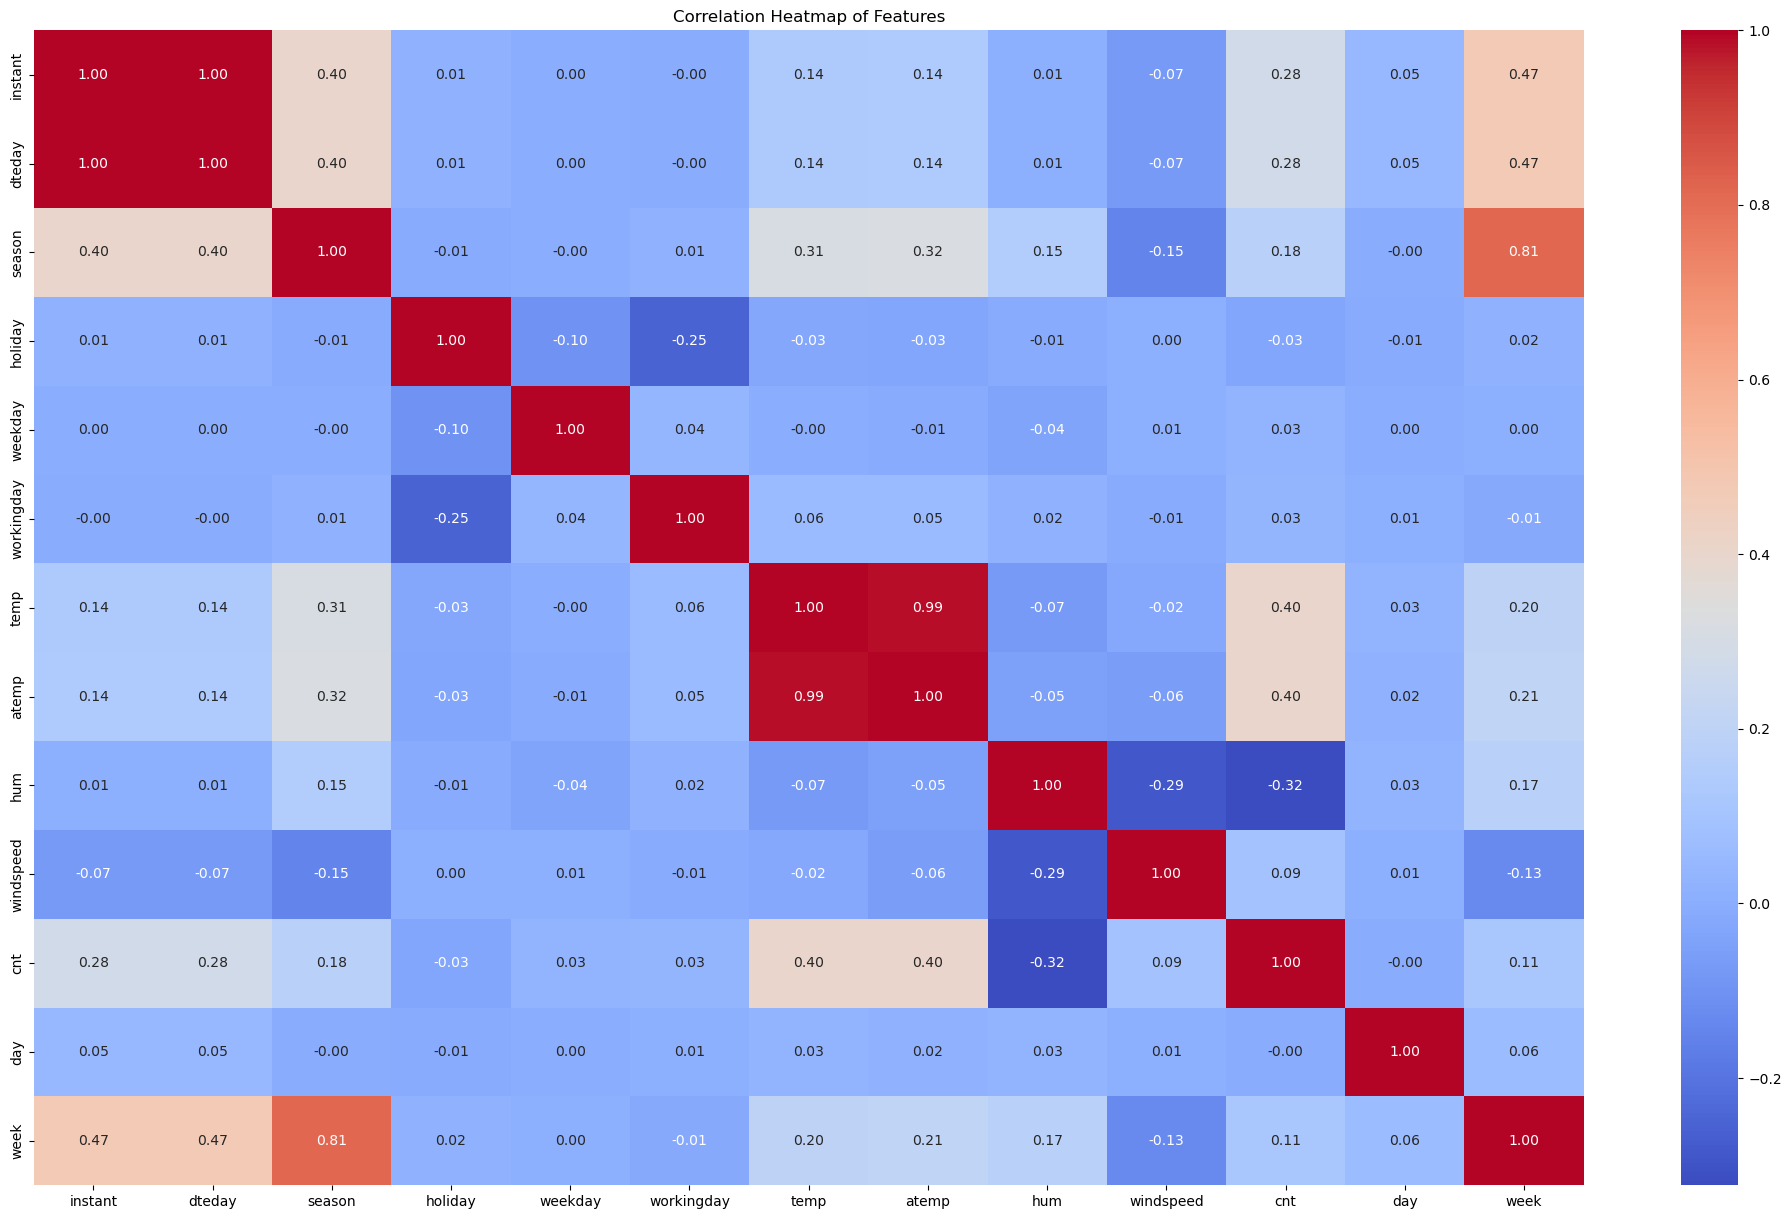

In [7]:
# Correlation heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(df.drop(columns=["weathersit", "casual", "registered", "datetime", "yr", "mnth", "hr"]).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Features")
plt.show()

# temp and atemp are basically the same thing. we will need to drop one of them
# time related variables are correlated but it doesn't matter, we won't use them in the end
# instant is basically hr but offering less information, we drop it
# other than that, cnt doesn't have many high correlated variables, perhaps we need to create some more

##### Part 1.3 Distributions of the columns

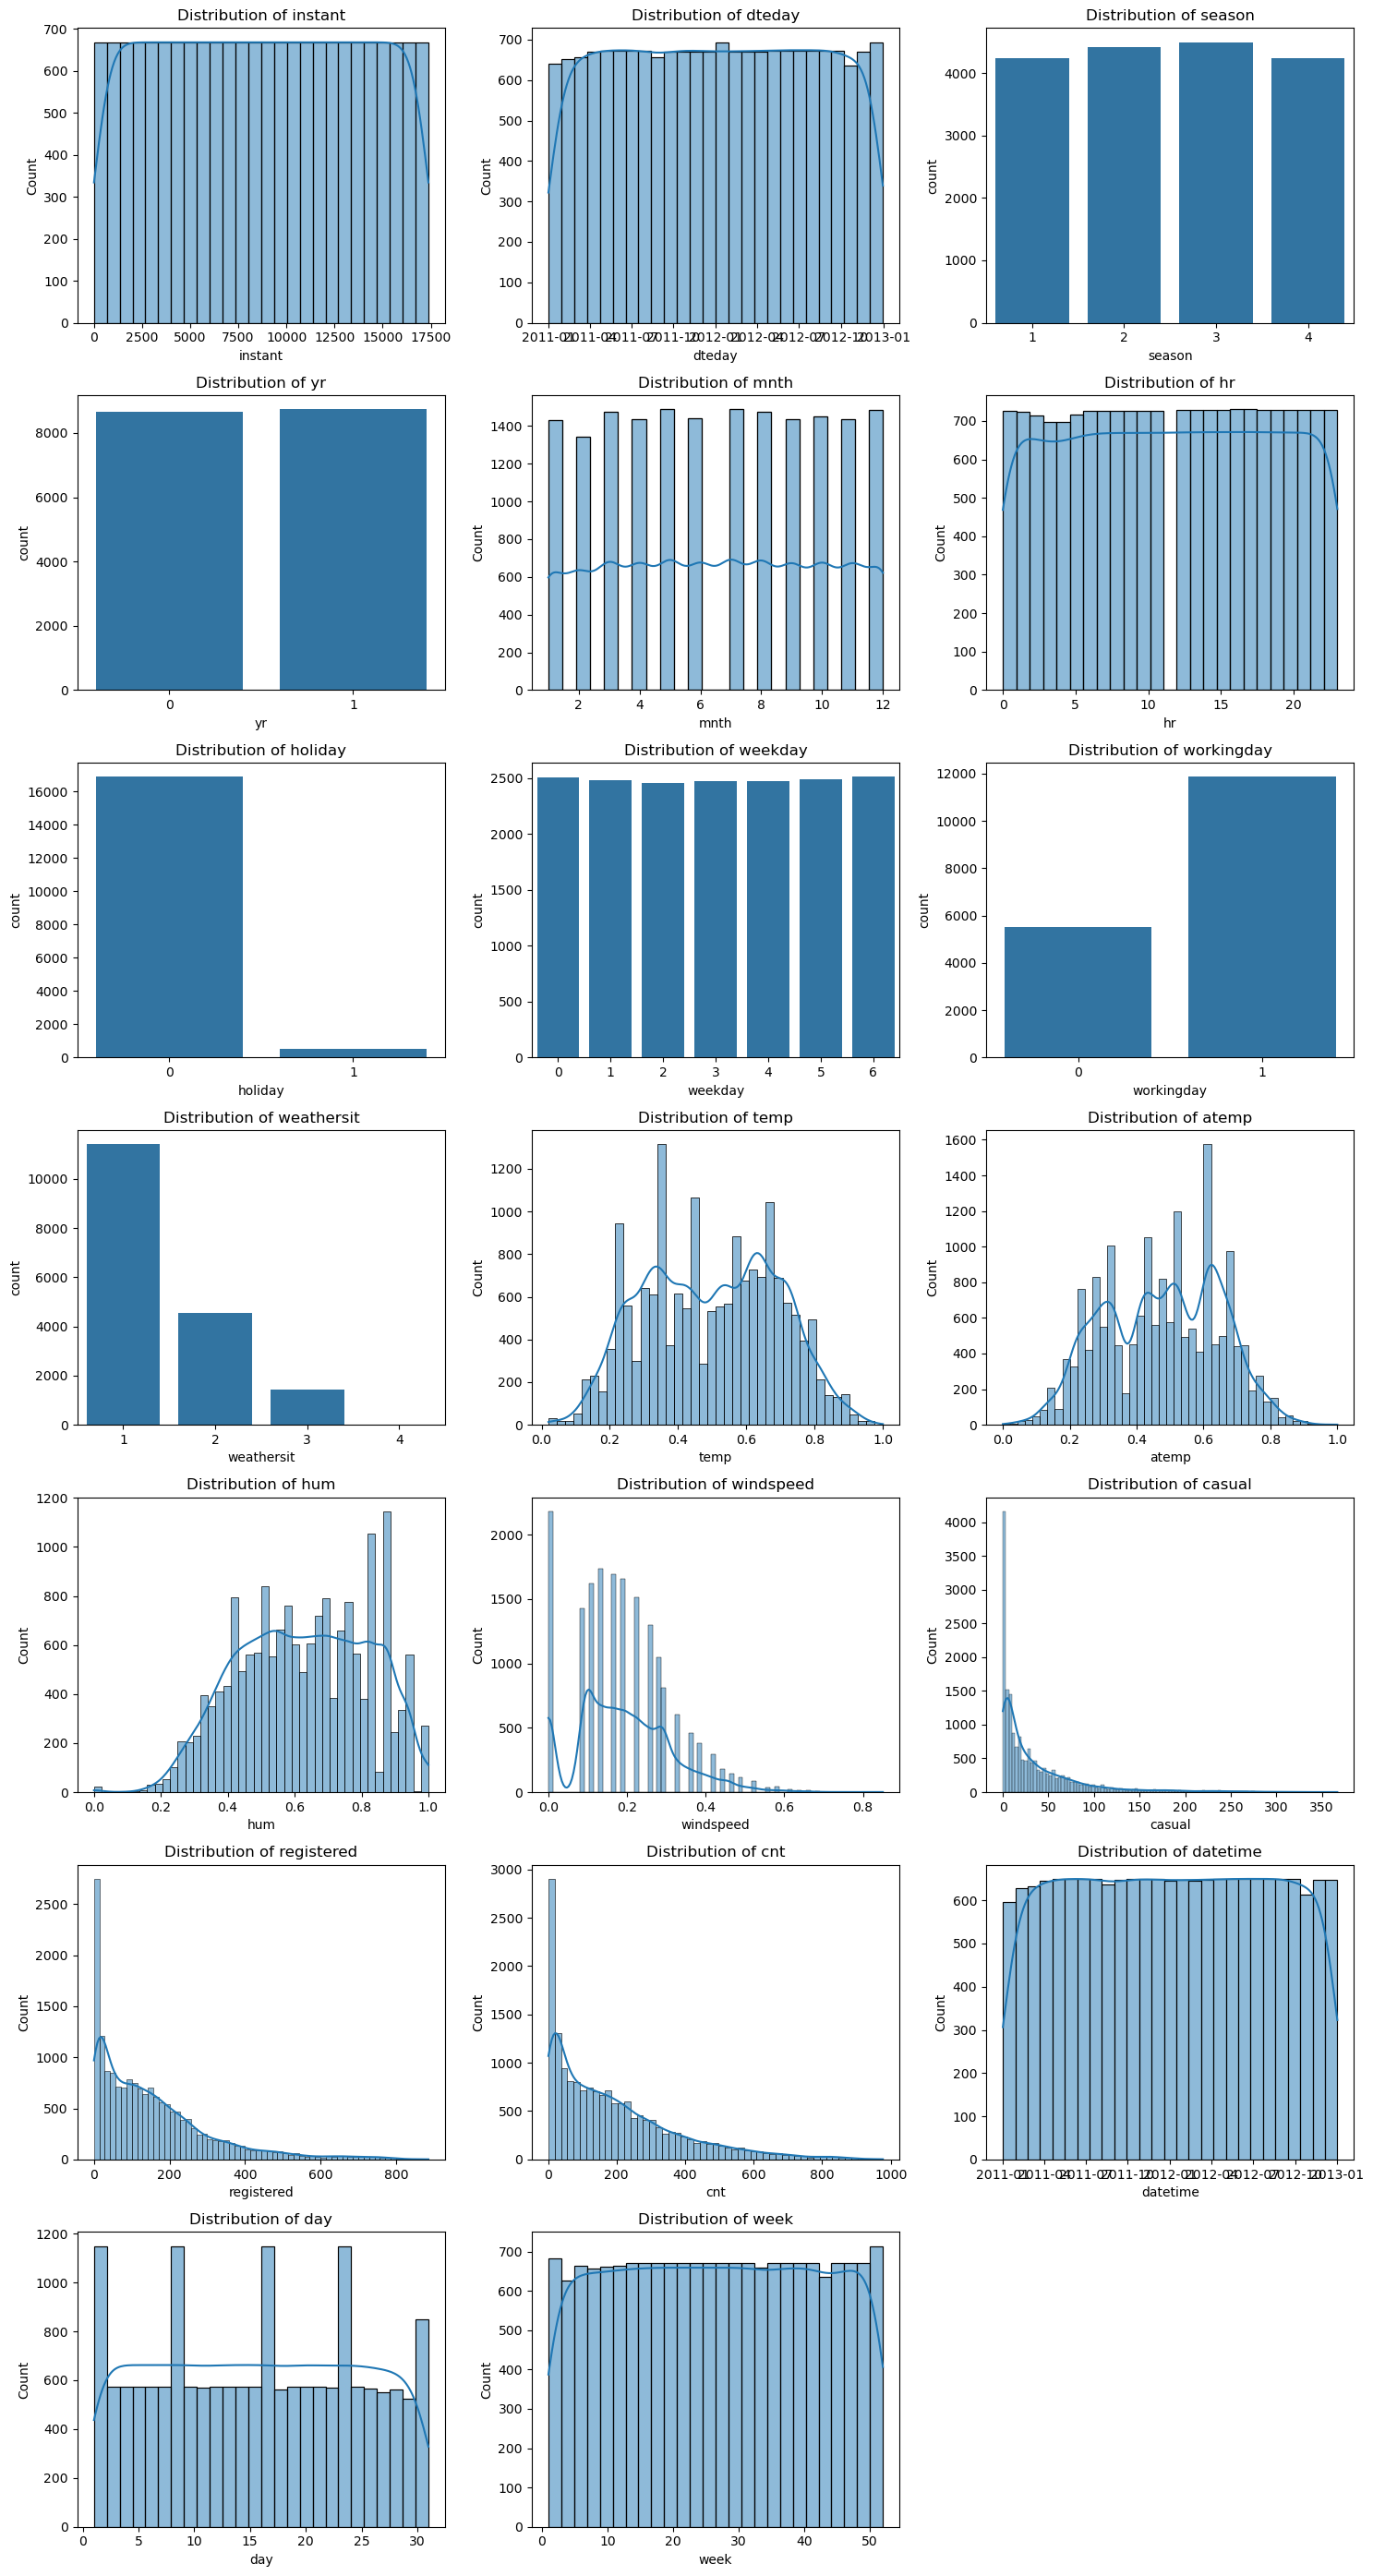

In [8]:
# Define the number of columns in each row of plots
n_cols = 3
n_rows = (len(df.columns) + n_cols - 1) // n_cols  # Calculate rows needed based on the number of columns

# Set up the matplotlib figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # Flatten to easily index each subplot

for i, col in enumerate(df.columns):
    ax = axes[i]  # Get the specific subplot axis
    if df[col].dtype == 'object' or len(df[col].unique()) < 10:  # Categorical data
        sns.countplot(data=df, x=col, ax=ax)
    else:  # Numerical data
        sns.histplot(df[col], kde=True, ax=ax)  # KDE plot for numerical data
    
    ax.set_title(f"Distribution of {col}")

# Hide any unused subplots if the number of columns is less than rows * cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

In [9]:
# weathersit == 4 is not null
print(df["weathersit"].value_counts())
# looks like the variables are distributed as they logically should be 
# except the distribution of day is weird 

# Let's check whether there are missing days:
missing_days = {}

# Group by year and month to check each month separately
for (yr, mnth), group in df.groupby(['yr', 'mnth']):
    if yr == 0:
        yr = 2011
    else:
        yr = 2012
    # Generate the complete range of days for that mnth
    full_range = pd.date_range(start=f'{yr}-{mnth:02d}-01', 
                                end=f'{yr}-{mnth:02d}-{group["dteday"].max().day}')
    
    # Extract the unique days from the 'dteday' column
    unique_days = group['dteday'].dt.date.unique()
    
    # Check for missing days by comparing the two sets
    missing = set(full_range.date) - set(unique_days)
    if missing:
        missing_days[(yr, mnth)] = sorted(missing)

if missing_days:
    print("Missing days found in the following yr-mnth pairs:")
    for (yr, mnth), days in missing_days.items():
        print(f"{yr}-{mnth:02d}: Missing days: {days}")
else:
    print("No missing days detected.")
# Seems like all is in order in the end

weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64
No missing days detected.


##### 1.4 Time series plot of the target vs different time columns

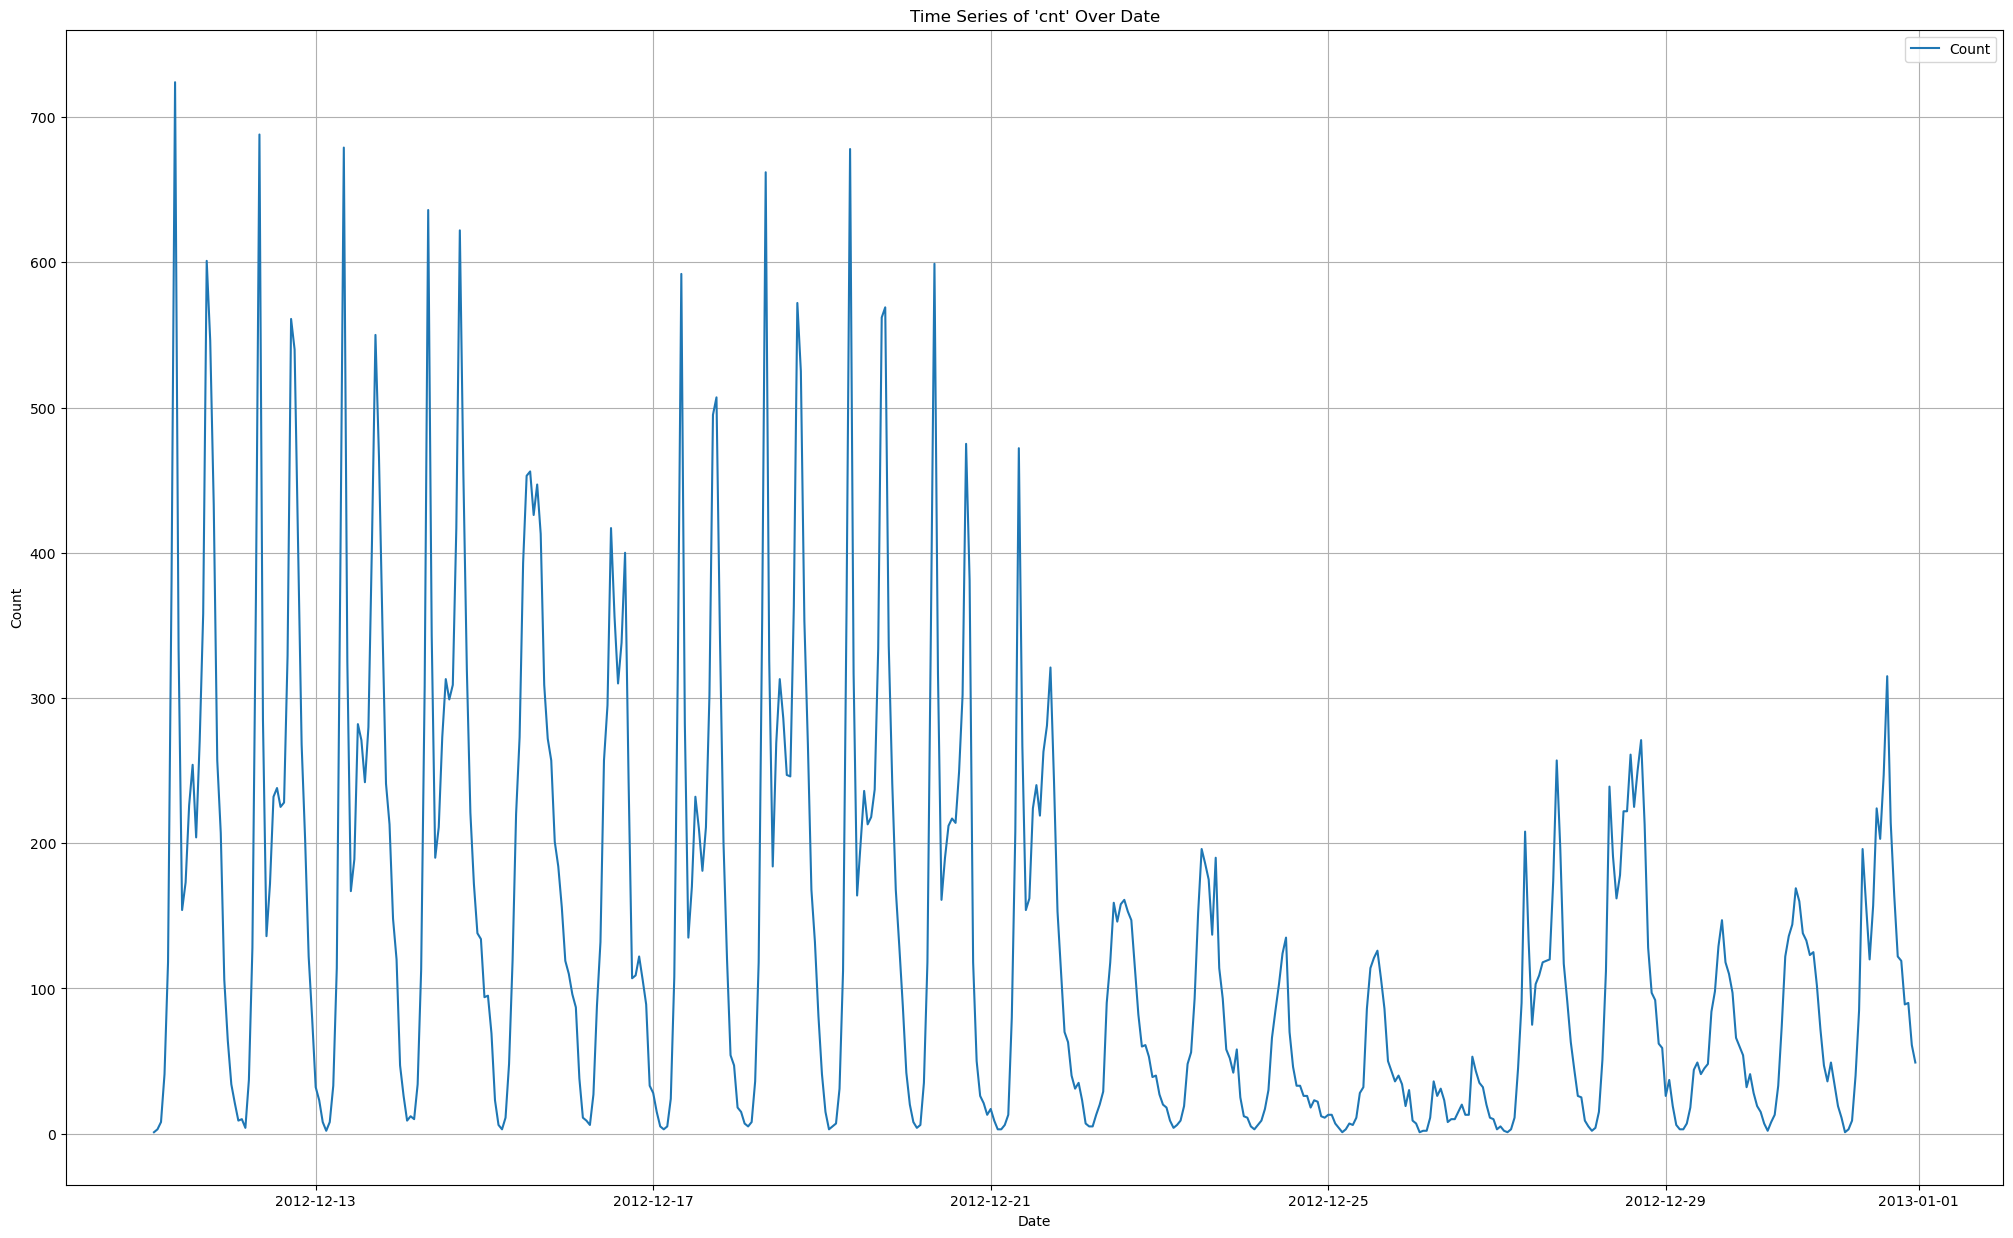

In [10]:
hours = 500
# Plot the time series
plt.figure(figsize=(25, 15))
plt.plot(df['datetime'][-hours:], df['cnt'][-hours:], label='Count')
plt.title("Time Series of 'cnt' Over Date")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.grid()
plt.show()

# There seems to be some cyclicality in the data

In [11]:
# Plot average bike usage by hour
hourly_usage = df.groupby('hr')['cnt'].mean().reset_index()
fig = px.line(hourly_usage, x='hr', y='cnt', title='Average Bike Usage by Hour')
fig.show()

# Plot average bike usage by week
hourly_usage = df.groupby('week')['cnt'].mean().reset_index()
fig = px.line(hourly_usage, x='week', y='cnt', title='Average Bike Usage by Day')
fig.show()

# Plot bike usage by season and weather
fig = px.box(df, x='season', y='cnt', color='weathersit', title='Bike Usage by Season and Weather')
fig.show()

# we see that hour cyclicality plays a role and seasonal as well
# this visually confirms our suspicions from before
# we also see that the heavy rain only happens in the first quarter of the year, perhaps the rain categorical will be redundant

In [15]:
df[df['holiday'] == 1]['cnt']

372      17
373      16
374       8
375       2
376       3
         ..
17230    36
17231    40
17232    34
17233    19
17234    30
Name: cnt, Length: 500, dtype: int64

C:\Users\ruben\AppData\Local\Temp\ipykernel_22108\205670578.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




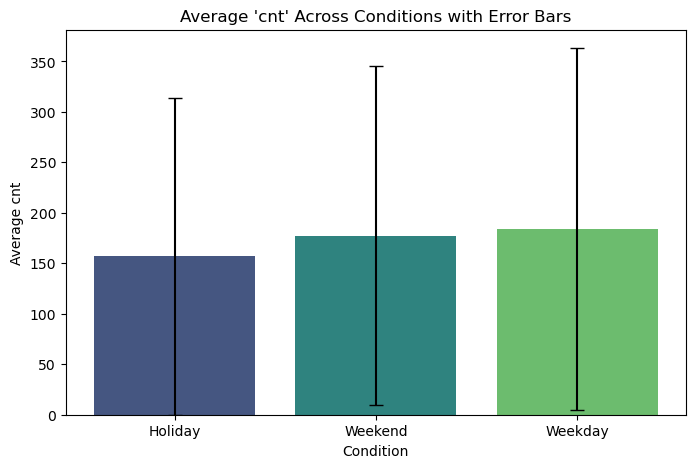

In [ ]:
# Create a summary DataFrame with averages and standard deviations
summary = pd.DataFrame({
    "Condition": ["Holiday", "Weekend", "Weekday"],
    "Mean_cnt": [
        df[df['holiday'] == 1]['cnt'].mean(),
        df[df['weekday'] == 0]['cnt'].mean(),
        df[df['weekday'] == 1]['cnt'].mean()
    ],
    "Std_cnt": [
        df[df['holiday'] == 1]['cnt'].std(),
        df[df['weekday'] == 0]['cnt'].std(),
        df[df['weekday'] == 1]['cnt'].std()
    ]
})

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(
    x="Condition", 
    y="Mean_cnt", 
    data=summary, 
    errorbar=None,
    
    palette="viridis"
)

# Add error bars using the standard deviations
plt.errorbar(
    x=summary["Condition"], 
    y=summary["Mean_cnt"], 
    yerr=summary["Std_cnt"], 
    fmt='none', 
    c='black', 
    capsize=5
)

# Add labels and title
plt.title("Average 'cnt' Across Conditions with Error Bars")
plt.xlabel("Condition")
plt.ylabel("Average cnt")
plt.show()


# There are more people using the bikes during the weekdays rather than weekends or holidays
# This suggests that people use the bikes to commute rather than for leisure

##### 1.6 Autocorrelation analysis

In [13]:
from pmdarima.arima import ndiffs, nsdiffs
s= 24
d = ndiffs(df["cnt"], alpha = 0.05, test='adf')  # regular differences?
D = nsdiffs(df["cnt"], m = s, test='ocsb') # # seasonal differences?
print(d, D)

# The series is stationary in the mean, we can make predictions

0 0


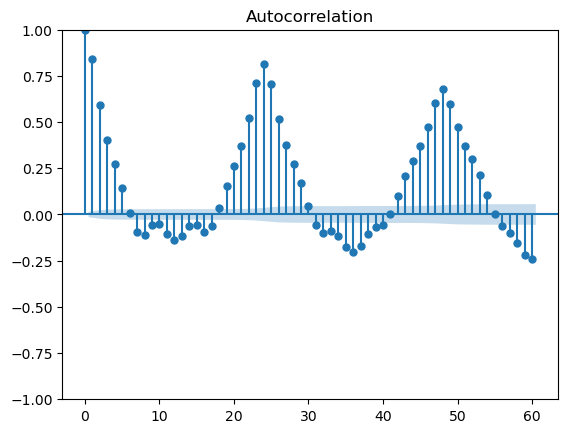

KeyboardInterrupt: 

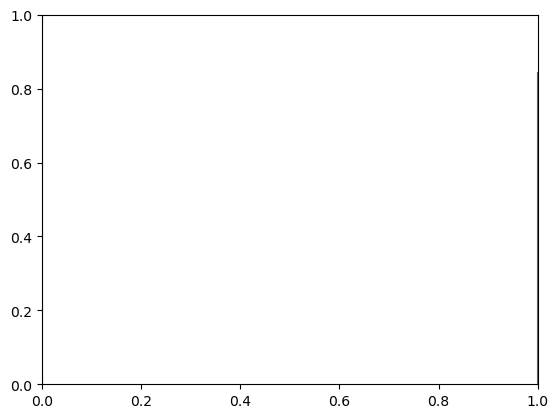

In [14]:
# We plot ACF and PACF to see whether previous values could be useful to predict future (basically like arima)
num_lags = 60
data = df["cnt"]
plot_acf(data.values,lags=num_lags)
plt.show()
plot_pacf(data.values,lags=num_lags,method="ols")
plt.show()
# Seems like there is daily cyclicality, 1lag, and 2MA also good predictors

In [ ]:
# If we were allowed, we would have carried out proper time series analysis and the fit the xgboost on the residuals
# but since we're not, we create the following variables which emulate the time series analysis (SARIMA)
# As such, we add lagged features which we believe will help the analysis.

# Non-seasonal AR terms
df['AR_1'] = df['cnt'].shift(1)
df['AR_2'] = df['cnt'].shift(2)
df['AR_3'] = df['cnt'].shift(3)


# Non-seasonal MA terms (shifted rolling means)
for i in range(1, 6):
    df[f'MA_{i}'] = df['cnt'].rolling(window=i).mean().shift(1)

"""


# Underneath would simulate SARIMA with the interaction terms, but since we do the FFT seasonalities (just below), it is redundant.
# We tried having the SARIMA parmeters plus sincos, ARIMA + sincos, just SARIMA. ARIMA + sincos was the best (avoids redundancy in seasonality)


# Seasonal AR terms
df['SAR_24'] = df['cnt'].shift(24)
df['SAR_48'] = df['cnt'].shift(48)
df['SAR_72'] = df['cnt'].shift(72)

# Seasonal MA terms (shifted rolling means for seasonal periods)
df['SMA_24'] = df['cnt'].rolling(window=24).mean().shift(1)
df['SMA_48'] = df['cnt'].rolling(window=48).mean().shift(1)

# Generate interaction terms
interaction_terms = {}

# Non-Seasonal AR and Seasonal AR interactions
for ar in ['AR_1', 'AR_2', 'AR_3']:
    for sar in ['SAR_24', 'SAR_48', 'SAR_72']:
        interaction_terms[f'{ar}_{sar}'] = df[ar] * df[sar]

# Non-Seasonal AR and Seasonal MA interactions
for ar in ['AR_1', 'AR_2', 'AR_3']:
    for sma in ['SMA_24', 'SMA_48']:
        interaction_terms[f'{ar}_{sma}'] = df[ar] * df[sma]

# Non-Seasonal MA and Seasonal AR interactions
for ma in [f'MA_{i}' for i in range(1, 6)]:
    for sar in ['SAR_24', 'SAR_48', 'SAR_72']:
        interaction_terms[f'{ma}_{sar}'] = df[ma] * df[sar]

# Non-Seasonal MA and Seasonal MA interactions
for ma in [f'MA_{i}' for i in range(1, 6)]:
    for sma in ['SMA_24', 'SMA_48']:
        interaction_terms[f'{ma}_{sma}'] = df[ma] * df[sma]

# Add all interaction terms to the DataFrame
for term_name, term_value in interaction_terms.items():
    df[term_name] = term_value

"""

"\n\n\n# Underneath would simulate SARIMA with the interaction terms, but since we do the FFT seasonalities (just below), it is redundant.\n# We tried having the SARIMA parmeters plus sincos, ARIMA + sincos, just SARIMA. ARIMA + sincos was the best (avoids redundancy in seasonality)\n\n\n# Seasonal AR terms\ndf['SAR_24'] = df['cnt'].shift(24)\ndf['SAR_48'] = df['cnt'].shift(48)\ndf['SAR_72'] = df['cnt'].shift(72)\n\n# Seasonal MA terms (shifted rolling means for seasonal periods)\ndf['SMA_24'] = df['cnt'].rolling(window=24).mean().shift(1)\ndf['SMA_48'] = df['cnt'].rolling(window=48).mean().shift(1)\n\n# Generate interaction terms\ninteraction_terms = {}\n\n# Non-Seasonal AR and Seasonal AR interactions\nfor ar in ['AR_1', 'AR_2', 'AR_3']:\n    for sar in ['SAR_24', 'SAR_48', 'SAR_72']:\n        interaction_terms[f'{ar}_{sar}'] = df[ar] * df[sar]\n\n# Non-Seasonal AR and Seasonal MA interactions\nfor ar in ['AR_1', 'AR_2', 'AR_3']:\n    for sma in ['SMA_24', 'SMA_48']:\n        interac

##### 1.7 cyclicality analysis

Unique cycles: ['0.10', '0.17', '0.23', '0.25', '0.27', '0.50', '90.52', '120.69', '181.03', '362.06'] in days
Unique cycles: ['2.40', '4.08', '5.52', '6.00', '6.48', '12.00', '2172.48', '2896.56', '4344.72', '8689.44'] in hours


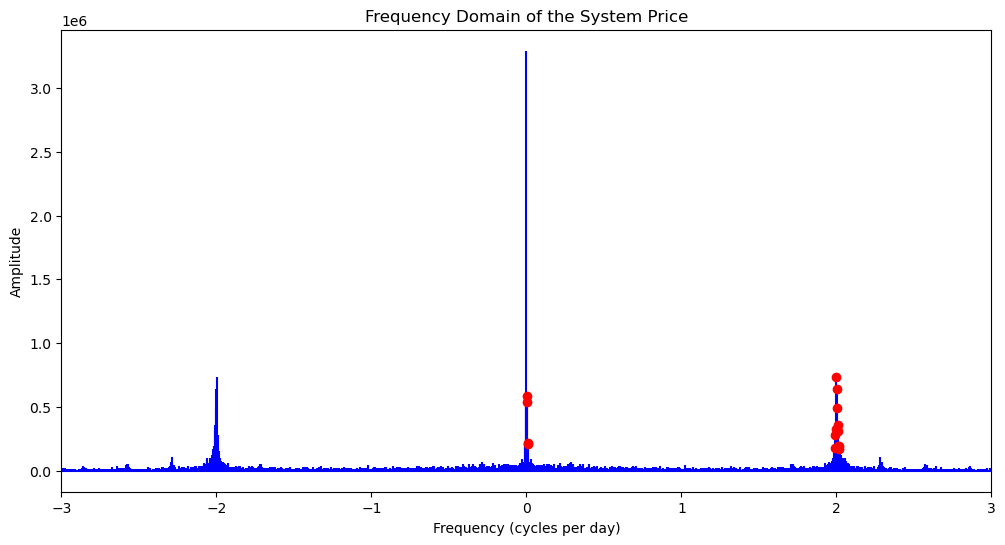

In [ ]:
# Compute fast Fourier transform
price_fft = np.fft.fft(df["cnt"].dropna())

# Get frequencies corresponding to FFT coefficients
freqs = np.fft.fftfreq(len(price_fft), d=1/48)

# Calculate amplitudes
amplitudes = np.abs(price_fft)

# Calculate the threshold based on 5% of the max amplitude (we introduce this to avoid overfitting)
threshold = 0.05 * np.max(amplitudes)

# Filter positive frequencies with amplitudes above threshold
positive_indices = np.where((amplitudes > threshold) & (freqs > 0))
positive_freqs = freqs[positive_indices]
positive_amplitudes = amplitudes[positive_indices]

# Sort by amplitude
sorted_indices = np.argsort(positive_amplitudes)[::-1]

# Select the top frequencies and amplitudes
significant_freqs = positive_freqs[sorted_indices]
significant_amplitudes = positive_amplitudes[sorted_indices]

all_periods_in_days = 1 / significant_freqs
# Multiply each unique period by 24 to get values in hours
unique_cycles_in_days = np.unique(all_periods_in_days.round(2))
unique_cycles_in_hours = unique_cycles_in_days * 24

# Format the results from scientific notation to decimal for readability
formatted_cycles = [f"{value:.2f}" for value in np.sort(unique_cycles_in_days)]
print("Unique cycles:", formatted_cycles, "in days")
# Format the output to show in hours without scientific notation
formatted_cycles_in_hours = [f"{value:.2f}" for value in np.sort(unique_cycles_in_hours)]
print("Unique cycles:", formatted_cycles_in_hours, "in hours")

# Plotting the frequency spectrum
plt.figure(figsize=(12, 6))
plt.stem(freqs, amplitudes, 'b', markerfmt=" ", basefmt="-b")
plt.title('Frequency Domain of the System Price')
plt.xlabel('Frequency (cycles per day)')  # Corrected to cycles per day
plt.ylabel('Amplitude')

# Highlight significant frequencies on the plot
for freq, amp in zip(significant_freqs, significant_amplitudes):
    plt.plot(freq, amp, 'ro')  # Mark significant points in red

# Restrict the x-axis to show only -3 to +3
plt.xlim(-3, 3)

plt.show()

# We see that there are quarter day, half day, half year, and yearly cycles that the fft outlines

In [ ]:
# Seasonal cyclicalities
# We don't need one for year since there are only two of them
# Hourly Cycles but can be >24h, so can be both sub-daily and more than daily too
# using the results from the fft to plug in seasonalities
# We generate variables representing the sine and cosine components for each cyclical pattern identified by the FFT, ensuring the cyclical nature of the data is effectively captured.


for cycle in unique_cycles_in_hours:
    df[f"hr_{cycle:.2f}h_sin"] = np.sin(2 * np.pi * df['hr'] / cycle)
    df[f"hr_{cycle:.2f}h_cos"] = np.cos(2 * np.pi * df['hr'] / cycle)


##### 1.8 Outlier detection

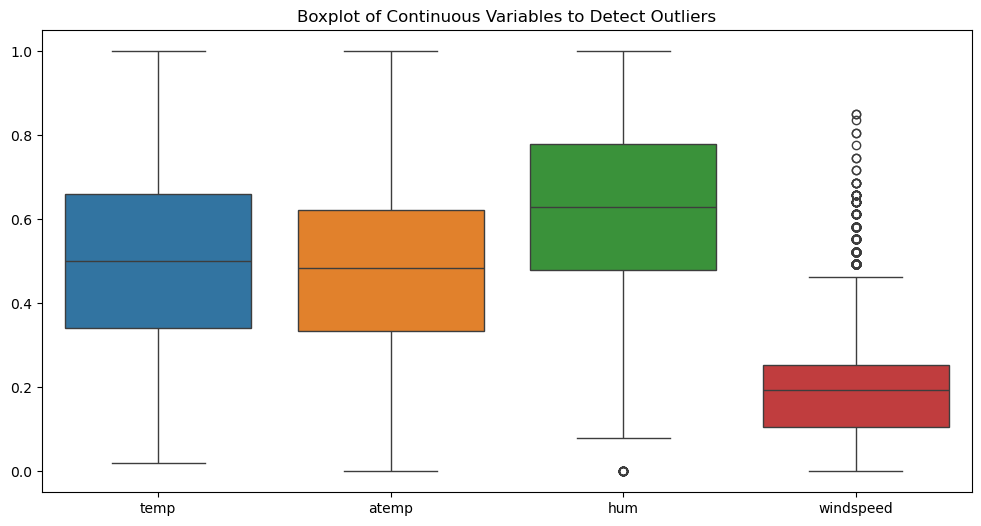

In [ ]:
# Visualize distributions to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['temp', 'atemp', 'hum', 'windspeed']])
plt.title("Boxplot of Continuous Variables to Detect Outliers")
plt.show()

# windspeed and hum have some outliers

In [ ]:
windspeed_95th = df['windspeed'].quantile(0.95)
print("95th Percentile of windspeed:", windspeed_95th)

df_no_outliers = df[df['windspeed'] <= windspeed_95th]

summary_df = pd.DataFrame({
    'Full Dataset Statistics for cnt:': df['cnt'].describe(),
    'Statistics for cnt without windspeed outliers:': df_no_outliers['cnt'].describe()
})

print("\nStatistics with and without outliers:")
print(summary_df.to_string())
print()
# Correlation with outliers
corr_with_outliers = df['windspeed'].corr(df['cnt'])
print("Correlation with outliers:", corr_with_outliers)

# Correlation without outliers
corr_without_outliers = df_no_outliers['windspeed'].corr(df_no_outliers['cnt'])
print("Correlation without outliers:", corr_without_outliers)

"""
The differences in both descriptive statistics and correlation are minor. 
The outliers do not appear to distort the data significantly, and they may represent real high-windspeed events that are relevant to the analysis,
so we keep them but mark them with a new column. We do the same for the hum outlier

"""

95th Percentile of windspeed: 0.4179

Statistics with and without outliers:
       Full Dataset Statistics for cnt:  Statistics for cnt without windspeed outliers:
count                      17379.000000                                    16715.000000
mean                         189.463088                                      189.376249
std                          181.387599                                      181.934693
min                            1.000000                                        1.000000
25%                           40.000000                                       39.000000
50%                          142.000000                                      141.000000
75%                          281.000000                                      281.500000
max                          977.000000                                      977.000000

Correlation with outliers: 0.09323378392612536
Correlation without outliers: 0.11176839558572366


'\nThe differences in both descriptive statistics and correlation are minor. \nThe outliers do not appear to distort the data significantly, and they may represent real high-windspeed events that are relevant to the analysis,\nso we keep them but mark them with a new column. We do the same for the hum outlier\n\n'

In [ ]:
# Create a new column that flags values above the 95th percentile for windspeed outliers
df['windspeed_above_95th'] = (df['windspeed'] > windspeed_95th).astype(int)
# We do the same but for the hum outliers below the 5th percentile
df['hum_below_5th'] = (df['hum'] < df['hum'].quantile(0.05)).astype(int)

##### 1.9 initial correlation assesment

In [ ]:
# We look at pairs of highly correlated vars
# we remove the seasonality related stuff, it doesn't make sense to analyse it here
# Define the list of substrings to search for in column names
substrings = ["AR", "SAR", "cos", "sin", "seasonal", "lag", "MA", "datetime", "dteday", "instant", "week", "mnth", "season"]

# Filter columns that do not contain any of the specified substrings
filtered_columns = [col for col in df.columns if not any(sub in col for sub in substrings)]

In [ ]:
# Select numeric columns to transform (excluding 'cnt' itself)
numeric_cols = df[filtered_columns].select_dtypes(include=[np.number]).columns

# Initialize a dictionary to store results
correlation_comparison = []

for col in numeric_cols:
    # Calculate the correlation of the squared feature with 'cnt'
    squared_corr = np.abs((df[col] ** 2).corr(df['cnt']))
    
    # Calculate the correlation of the absolute value of the feature with 'cnt'
    abs_corr = np.abs(df[col].abs().corr(df['cnt']))
    
    # Add to the comparison list
    correlation_comparison.append({
        'Feature': col,
        'Squared Correlation with cnt': squared_corr,
        'Absolute Correlation with cnt': abs_corr,
        'Higher Correlation': 'Squared' if squared_corr > abs_corr else 'Absolute'
    })

# Convert the list to a DataFrame for easy viewing
correlation_comparison_df = pd.DataFrame(correlation_comparison)
correlation_comparison_df = correlation_comparison_df.sort_values(by='Absolute Correlation with cnt', ascending=False)

# Display the comparison DataFrame
print(correlation_comparison_df.to_string())

# hum squared has a higher correlation with the target than normal hum, so we will add it to the analysis
# day squared and weathersit squared make no sense since they're categorical so we don't even consider that

                 Feature  Squared Correlation with cnt  Absolute Correlation with cnt Higher Correlation
11                   cnt                      0.929477                       1.000000           Absolute
10            registered                      0.863604                       0.972151           Absolute
9                 casual                      0.520957                       0.694564           Absolute
5                   temp                      0.399565                       0.404772           Absolute
6                  atemp                      0.396618                       0.400929           Absolute
1                     hr                      0.282642                       0.394071           Absolute
7                    hum                      0.324067                       0.322911            Squared
0                     yr                      0.250495                       0.250495           Absolute
4             weathersit                      0.146085 

##### 1.10 More feature engineering

In [ ]:
# Binarize weather situation for easier analysis
## Use pd.get_dummies to create one-hot encoded columns for 'weathersit'
df_weather = pd.get_dummies(df['weathersit'], prefix='is', drop_first=False)
## Rename columns for readability
df_weather.columns = ['is_clear', 'is_mist', 'is_light_rain', 'is_heavy_rain']
## Concatenate these columns with the original DataFrame (or drop 'weathersit' if not needed)
df = pd.concat([df.drop(columns=['weathersit']), df_weather], axis=1)

df['is_peak_hour'] = df['hr'].apply(lambda x: 1 if x in [7, 8, 9, 16, 17, 18, 19] else 0)
df['temp_bins'] = pd.qcut(df['temp'], q=3, labels=["low", "medium", "high"])
df['hum_bins'] = pd.qcut(df['hum'], q=3, labels=["low", "medium", "high"])
## Add a time of day feature based on hour, uneven to capture the rush hours
df['time_of_day'] = pd.cut(df['hr'], bins=[-1, 6, 9, 15, 19, 24], labels=[1, 2, 3, 4, 5])

df = pd.get_dummies(df, columns=['season', 'time_of_day', 'temp_bins', 'hum_bins'], prefix=['season', "tod", 'temp_bins', 'hum_bins'])
## Convert all boolean columns to binary (0/1)
df = df.astype({col: 'int' for col in df.select_dtypes(include='bool').columns})

# Denormalize the min max normalized columns, XGBoost does not need standardization and anyway std mu is better if we were to use them
df['temp'] = (df['temp'] * 41)
df['atemp'] = (df['atemp'] * 50)
df['hum'] = (df['hum'] * 100 )
df['windspeed'] = (df['windspeed'] * 67)  # this column is weird, max should be 1 but isn't

# combination vairables
df["temp_hum"] = df['temp'].copy() * df['hum'].copy()
df["temp_windspeed"] = df['temp'].copy() * df['windspeed'].copy()
df['weekday_hr'] = df['weekday'].copy() * df['hr'].copy()
## Ratio of casual to registered users
df['casual_registered_ratio'] = df['casual'].copy() / (df['registered'].copy() + 1)  # +1 to avoid division by zero

# polynomial feature (hum squared has higher correlation to cnt than hum)
df["hum_squared"] = df['hum'].copy() ** 2

In [ ]:
# Creating a new column that captures whether for each hour in the dataset there was sun (was between sunrise and sundown)
# Define the location (e.g., Washington D.C.)
city = LocationInfo("Washington D.C.", "USA", "America/New_York", 38.9072, -77.0369)

# Function to tag hours as daylight (1) or night (0), explicitly calling sunrise and sunset
def tag_daylight(row):
    date = row['datetime'].date()  # get the date part only
    hour = row['datetime'].hour
    
    try:
        # Get only sunrise and sunset times
        sunrise_time = sunrise(city.observer, date=date).hour
        sunset_time = sunset(city.observer, date=date).hour
    except ValueError:
        # If an error occurs, assume no daylight for that day
        return 0
    
    # Tag daylight hours as 1, otherwise 0
    return 1 if sunrise_time <= hour <= sunset_time else 0


# Apply the function to create the 'daylight' column
df['daylight'] = df.apply(tag_daylight, axis=1).copy()

In [ ]:
df.drop(columns=["instant", "dteday"], inplace=True)  # they are useless, instant is the same as hr but worse, dteday is the same as datetime but worse
df = df.dropna()
df.columns.values

array(['yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'datetime', 'day', 'week', 'AR_1', 'AR_2', 'AR_3', 'MA_1', 'MA_2',
       'MA_3', 'MA_4', 'MA_5', 'hr_2.40h_sin', 'hr_2.40h_cos',
       'hr_4.08h_sin', 'hr_4.08h_cos', 'hr_5.52h_sin', 'hr_5.52h_cos',
       'hr_6.00h_sin', 'hr_6.00h_cos', 'hr_6.48h_sin', 'hr_6.48h_cos',
       'hr_12.00h_sin', 'hr_12.00h_cos', 'hr_2172.48h_sin',
       'hr_2172.48h_cos', 'hr_2896.56h_sin', 'hr_2896.56h_cos',
       'hr_4344.72h_sin', 'hr_4344.72h_cos', 'hr_8689.44h_sin',
       'hr_8689.44h_cos', 'windspeed_above_95th', 'hum_below_5th',
       'is_clear', 'is_mist', 'is_light_rain', 'is_heavy_rain',
       'is_peak_hour', 'season_1', 'season_2', 'season_3', 'season_4',
       'tod_1', 'tod_2', 'tod_3', 'tod_4', 'tod_5', 'temp_bins_low',
       'temp_bins_medium', 'temp_bins_high', 'hum_bins_low',
       'hum_bins_medium', 'hum_bins_high', 'temp_hum', 'temp_wi

##### 1.11 New correlation analysis including the newly engineered feature

In [ ]:
# We look at pairs of highly correlated vars again, after all the feature engineering

# Get columns from selected_cols that exist in df
selected_in_df = [col for col in filtered_columns if col in df.columns]

# Calculate the absolute correlation matrix
corr_matrix = df[selected_in_df].corr().abs()

# Unstack the correlation matrix to turn it into a long-form DataFrame
corr_unstacked = corr_matrix.unstack()

#: Remove self-correlations
corr_unstacked = corr_unstacked[corr_unstacked.index.get_level_values(0) != corr_unstacked.index.get_level_values(1)]

#: Drop duplicate pairs by sorting index and converting to a set
# Sort each pair of columns alphabetically to remove duplicates
corr_unstacked.index = corr_unstacked.index.map(lambda x: tuple(sorted(x)))
corr_filtered = corr_unstacked[~corr_unstacked.index.duplicated(keep='first')]

# Filter correlations greater than or equal to 0.5 and sort
corr_filtered = corr_filtered[corr_filtered >= 0.3].sort_values(ascending=False)

# Display the filtered correlations
print(corr_filtered.to_string())

atemp       temp                    0.987675
cnt         registered              0.972144
casual      cnt                     0.694519
windspeed   windspeed_above_95th    0.510193
casual      registered              0.506539
            temp                    0.459513
atemp       casual                  0.453981
hum         hum_below_5th           0.421032
cnt         temp                    0.404565
atemp       cnt                     0.400751
cnt         hr                      0.393864
hr          registered              0.373932
casual      hum                     0.346934
registered  temp                    0.335134
atemp       registered              0.332366
cnt         hum                     0.322769
casual      workingday              0.301327
            hr                      0.301049


##### 1.12 Saving the data for streamlit use

In [ ]:
# Save the data to a csv so we can reuse it in the streamlit
df.to_csv("bike-sharing-hourly-new.csv")

In [ ]:
df.dtypes.to_string()

'yr                                  int64\nmnth                                int64\nhr                                  int64\nholiday                             int64\nweekday                             int64\nworkingday                          int64\ntemp                              float64\natemp                             float64\nhum                               float64\nwindspeed                         float64\ncasual                              int64\nregistered                          int64\ncnt                                 int64\ndatetime                   datetime64[ns]\nday                                 int32\nweek                               UInt32\nAR_1                              float64\nAR_2                              float64\nAR_3                              float64\nMA_1                              float64\nMA_2                              float64\nMA_3                              float64\nMA_4                              float64\nMA_5      

## PART II: Prediction Model

##### 2.1 Defining helper functions:

In [ ]:
def train_test_split(vars, target, testsize=0.2):
    # Select features and target variable
    X = df[vars]
    y = df[target]

    # Chronological Train-Test Split
    train_size = int(len(X) * (1-testsize))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    return X, y, X_train, X_test, y_train, y_test

In [ ]:
def eval_predictions(y_test, y_pred):
    # Evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("Mean Absolute Error:", mae)
    print("Root Mean Squared Error:", rmse)

    # Plot Predictions vs. Actual
    plt.figure(figsize=(25, 15))
    plt.plot(y_test.values, label="Actual")
    plt.plot(y_pred, label="Predicted", alpha=0.7)
    plt.legend()
    plt.title("Predictions vs. Actual Bike Usage")
    plt.show()
    return mae, rmse

#### 2.2 We start with a linear model

In [ ]:
# Define target and variables
target = "cnt"
variables = list(
               set(df.columns.values)
               - 
               set([
                    "atemp", "hum",  # because basically the same as temp and temp has higher corr, and bc we introduce hum squared
                    "hr", "day", "week", "mnth", "datetime",  # because we do the sin cos
                    "casual", "registered", "cnt",  # because it's the same as the target
                    ])
                 )

Mean Absolute Error: 54.94231056727094
Root Mean Squared Error: 80.00288591510011


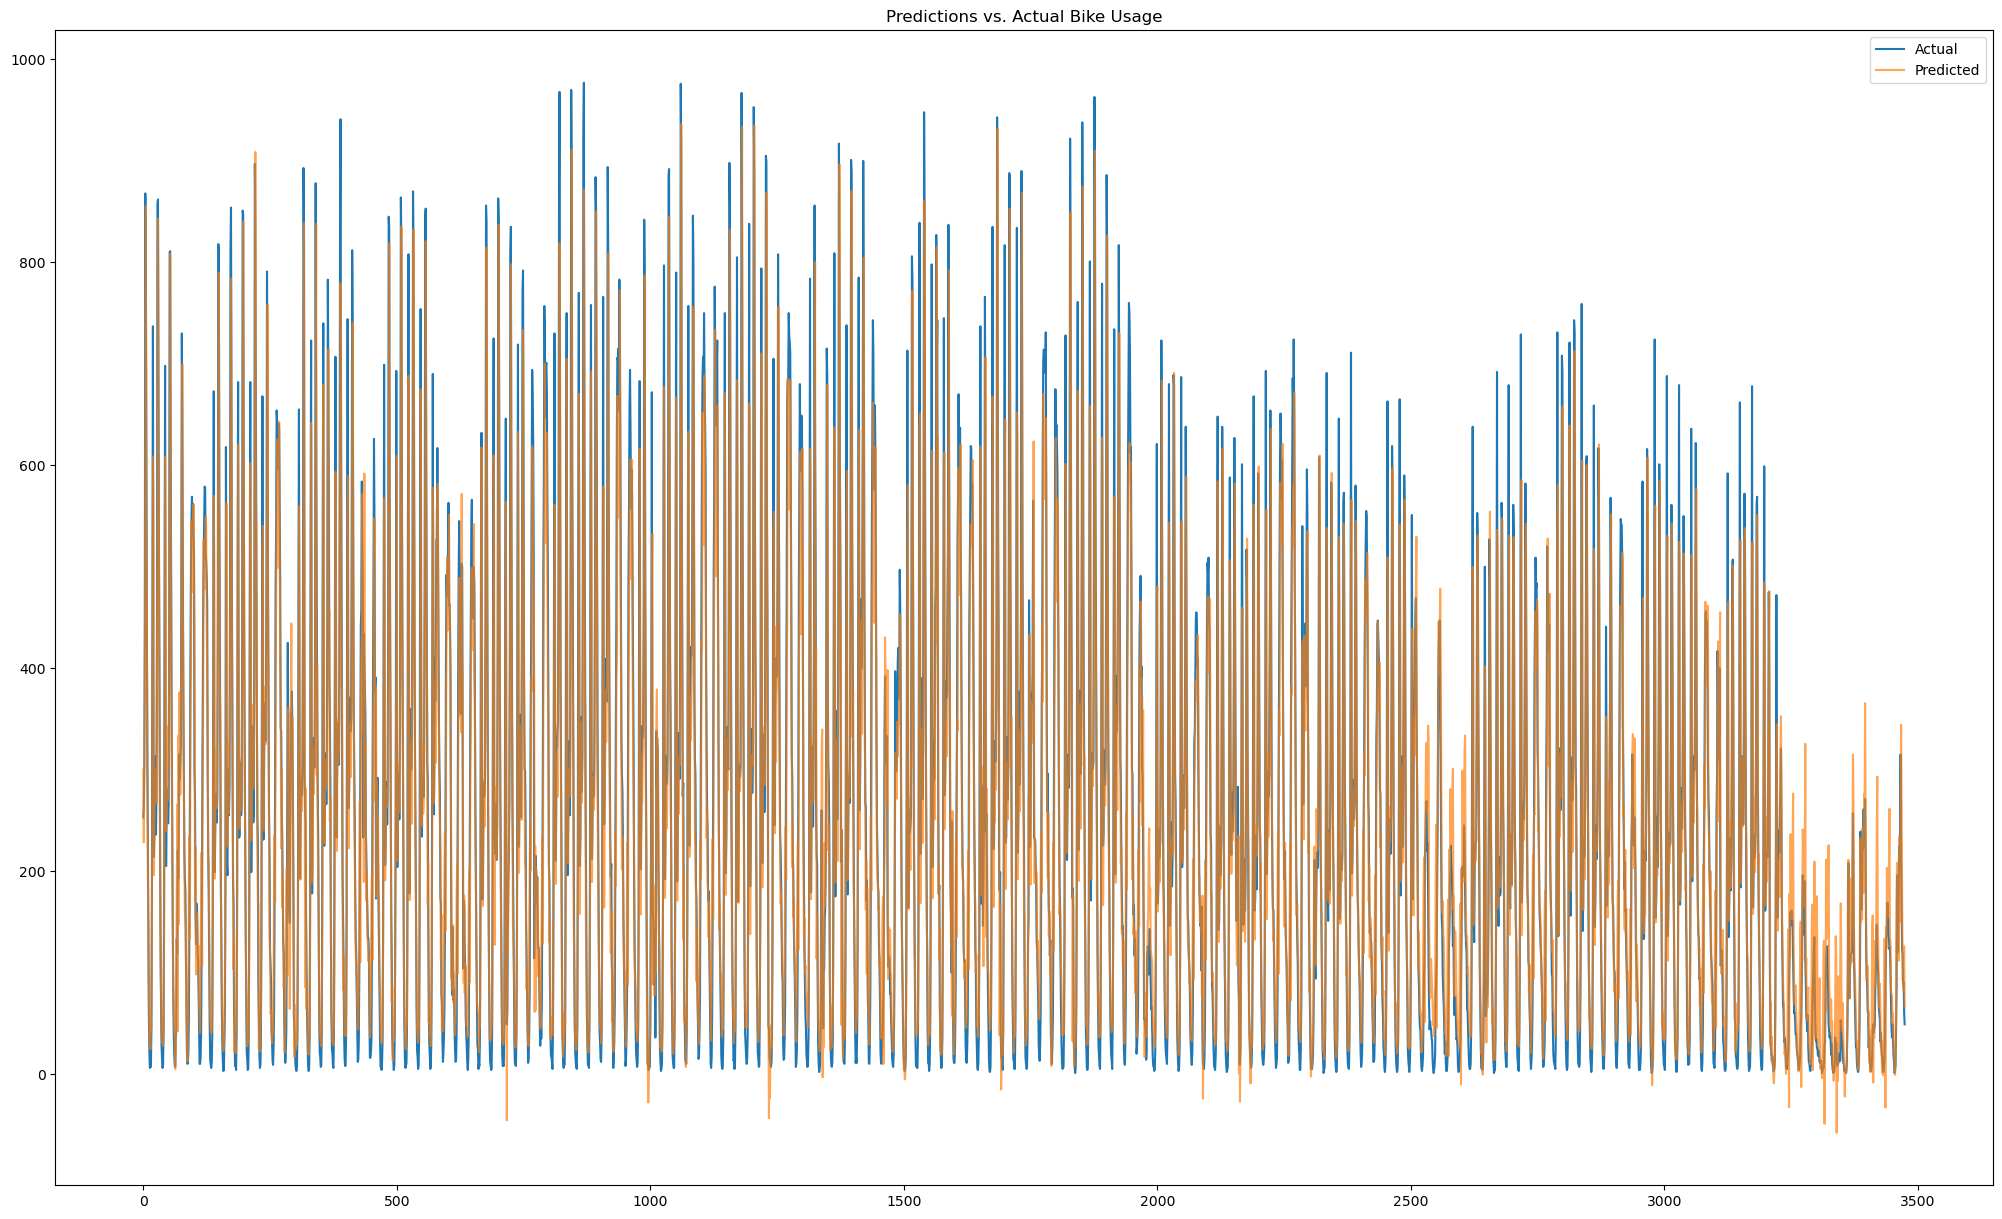

(54.94231056727094, 80.00288591510011)

In [ ]:
X, y, X_train, X_test, y_train, y_test = train_test_split(variables, target, 0.2)

# Initialize and train the Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# We save the features list along the model
feature_names = X_train.columns.tolist()  # Save feature names from training data

# Save model and feature names together
with open("baseline_linreg_model.pkl", "wb") as f:
    pickle.dump({"model": linreg, "feature_names": feature_names}, f)

# Make predictions
y_pred = linreg.predict(X_test)

eval_predictions(y_test, y_pred)

# Not very good result
# Plus predicts some negative values

### We move on to a more advanced model, XGBoost

1. **Initialize the Model**:
   - Start with a base `XGBRegressor` and define the objective function, typically `reg:squarederror` for regression tasks.

2. **Define a Hyperparameter Grid**:
   - Identify a range of key hyperparameters to tune, such as:
     - `n_estimators`: Number of trees in the ensemble.
     - `max_depth`: Controls the maximum depth of each tree, balancing underfitting and overfitting.
     - `learning_rate`: Shrinks weights of new trees to make learning more gradual.
     - `subsample` and `colsample_bytree`: Determine the fraction of data and features used for training each tree.
     - Regularization parameters (`alpha`, `lambda`, `gamma`) to control overfitting.

3. **Handle Temporal Data**:
   - Use `TimeSeriesSplit` to ensure that the model respects the temporal order of data, avoiding data leakage. This is especially important for time-series problems.

4. **Hyperparameter Optimization**:
   - Perform a hyperparameter search (e.g., randomized or grid search) to identify the best combination of parameters, ensuring the model is tailored to the data.

5. **Fit the Model**:
   - Train the model using the optimal parameters on the training data.

6. **Evaluate Feature Importance**:
   - Extract feature importance scores to understand which variables contribute most to the predictions. This can guide future feature engineering efforts.

7. **Make Predictions**:
   - Use the trained model to generate predictions on unseen test data.

---

### Why These Steps Matter
- **Customization**: Optimizing hyperparameters ensures the model is well-suited to the specific dataset.
- **Temporal Integrity**: Time-series cross-validation prevents leakage and ensures reliable performance evaluation.
- **Explainability**: Analyzing feature importance provides insights into the data and model behavior.
- **Performance**: These steps collectively maximize the predictive accuracy and reliability of the XGBoost model.

In [ ]:
def optimized_xgboost(X_train, X_test, y_train):
    # Define the XGBoost model
    xgb = XGBRegressor(objective='reg:squarederror', random_state=random_state)
    # Define parameter grid
    param_dist = {
        'n_estimators': [500, 1000, 2000],
        'max_depth': [1, 2, 3, 5, 7],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.7, 0.8, 1.0],
        'colsample_bytree': [0.7, 0.8, 1.0],
        'alpha': [0, 0.1, 0.5, 1.0],
        'lambda': [0, 0.1, 0.5, 1.0],
        'gamma': [0, 0.1, 0.2, 0.5]
    }

    # Use TimeSeriesSplit for cross-validation, since we have a time series and we have to respect the temporality in order to avoid data leakage
    tscv = TimeSeriesSplit(n_splits=4)

    # Perform Grid Search with Time Series Cross-Validation
    random_search = RandomizedSearchCV(
        xgb,
        param_distributions=param_dist,
        n_iter = 50,
        cv=tscv,
        scoring='neg_mean_squared_error',
        random_state=random_state,
        n_jobs=-1,
        error_score='raise',
        verbose=1 
    )
    random_search.fit(X_train, y_train.to_numpy())
    # extract the best model
    best_xgb = random_search.best_estimator_

    # Output the best parameters
    print("Best Parameters:", random_search.best_params_)
    
    # Calculate feature importances
    feature_importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_xgb.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    # Print them out
    print("Feature importances:\n", feature_importances.to_string())

    # Calculate Predictions
    y_pred = best_xgb.predict(X_test)
    return [y_pred, best_xgb]

##### 2.3 For reference, xgboost without cyclicality and ARIMA

In [ ]:
# We define all the cols of df that are not FFT or ARIMA related, and also considering what we discussed in part 1
variables_without_cyclicality_or_ARIMA = ['yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'temp',
      'hum', 'windspeed', 'day', 'week', 'windspeed_above_95th', 'hum_below_5th',
       'is_clear', 'is_mist', 'is_light_rain', 'is_heavy_rain',
       'is_peak_hour', 'season_1', 'season_2', 'season_3', 'season_4',
       'tod_1', 'tod_2', 'tod_3', 'tod_4', 'tod_5', 'temp_hum',
       'temp_windspeed', 'weekday_hr', 'casual_registered_ratio',
       'hum_squared', 'daylight']

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Best Parameters: {'subsample': 0.7, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.05, 'lambda': 1.0, 'gamma': 0.5, 'colsample_bytree': 1.0, 'alpha': 0}
Feature importances:
                     Feature  Importance
25                    tod_4    0.257476
5                workingday    0.119535
2                        hr    0.109273
0                        yr    0.083963
17             is_peak_hour    0.073544
18                 season_1    0.067884
6                      temp    0.060580
21                 season_4    0.060042
15            is_light_rain    0.035798
24                    tod_3    0.031818
30  casual_registered_ratio    0.020842
13                 is_clear    0.009087
10                     week    0.008803
7                       hum    0.008556
1                      mnth    0.007154
29               weekday_hr    0.006347
4                   weekday    0.005628
32                 daylight    0.

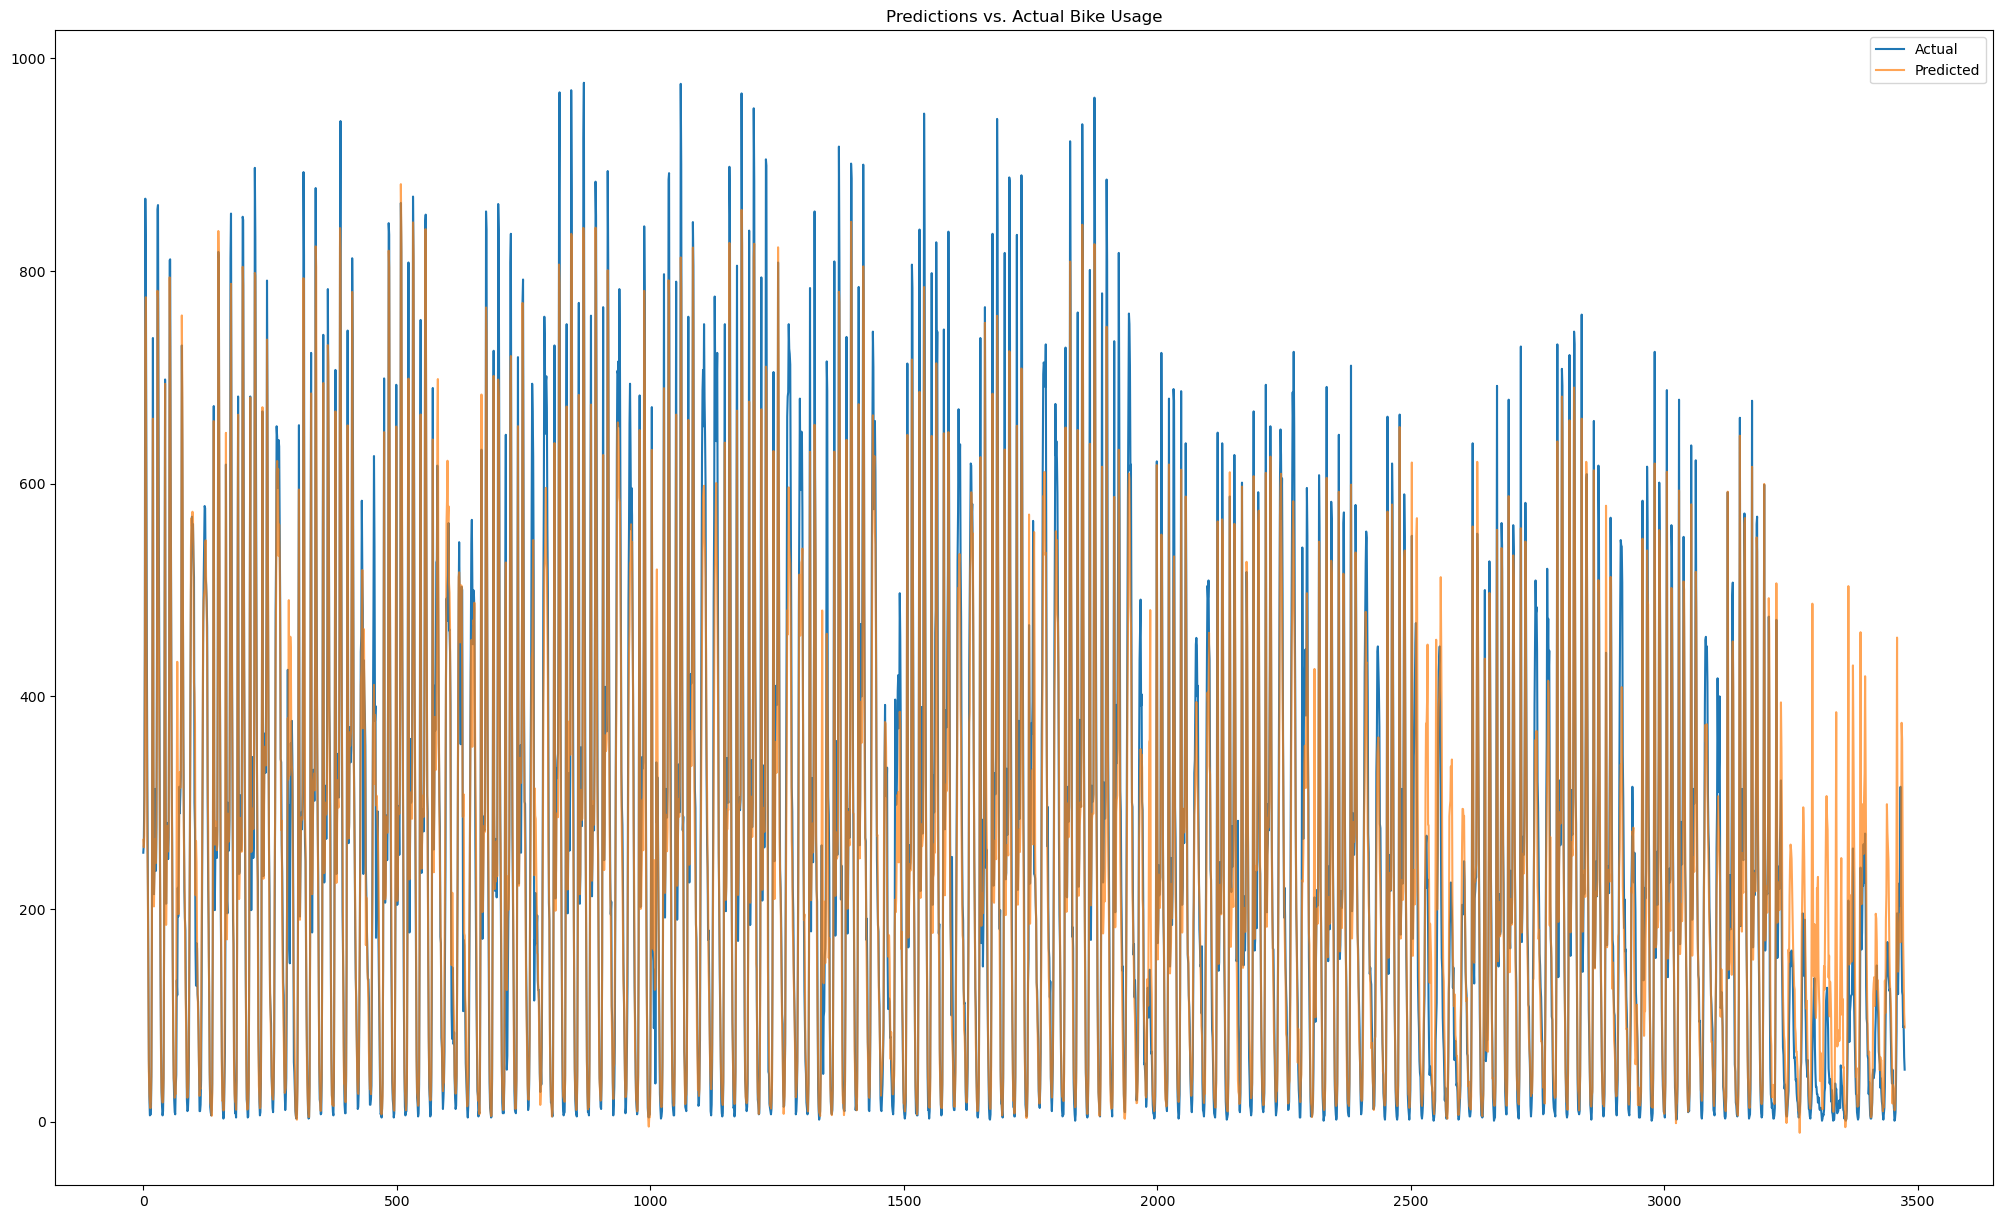

(40.844024592406456, 62.71198253204339)

In [ ]:
# Carry out and evalute the XGBoost
X, y, X_train, X_test, y_train, y_test = train_test_split(variables_without_cyclicality_or_ARIMA, target, 0.2)
eval_predictions(y_test, optimized_xgboost(X_train, X_test, y_train)[0])

##### 2.4 Now, the final model with the cyclicality and ARIMA related variables

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Best Parameters: {'subsample': 0.7, 'n_estimators': 2000, 'max_depth': 7, 'learning_rate': 0.01, 'lambda': 0.1, 'gamma': 0, 'colsample_bytree': 0.8, 'alpha': 1.0}
Feature importances:
                     Feature  Importance
55                     AR_1    0.170449
41                     MA_1    0.141517
35             is_peak_hour    0.115901
39             hr_5.52h_sin    0.086602
30                    tod_2    0.073051
9             hr_12.00h_sin    0.040955
28          hr_2172.48h_cos    0.039618
8           hr_8689.44h_sin    0.033121
24                    tod_3    0.031387
1           hr_2172.48h_sin    0.024334
26               workingday    0.023751
37             hr_2.40h_sin    0.022297
29             hr_6.48h_sin    0.020566
14                       yr    0.018243
40             hr_6.00h_sin    0.015181
15                    tod_4    0.014154
0              hr_4.08h_cos    0.013503
51             hr_6.48h_cos    0.

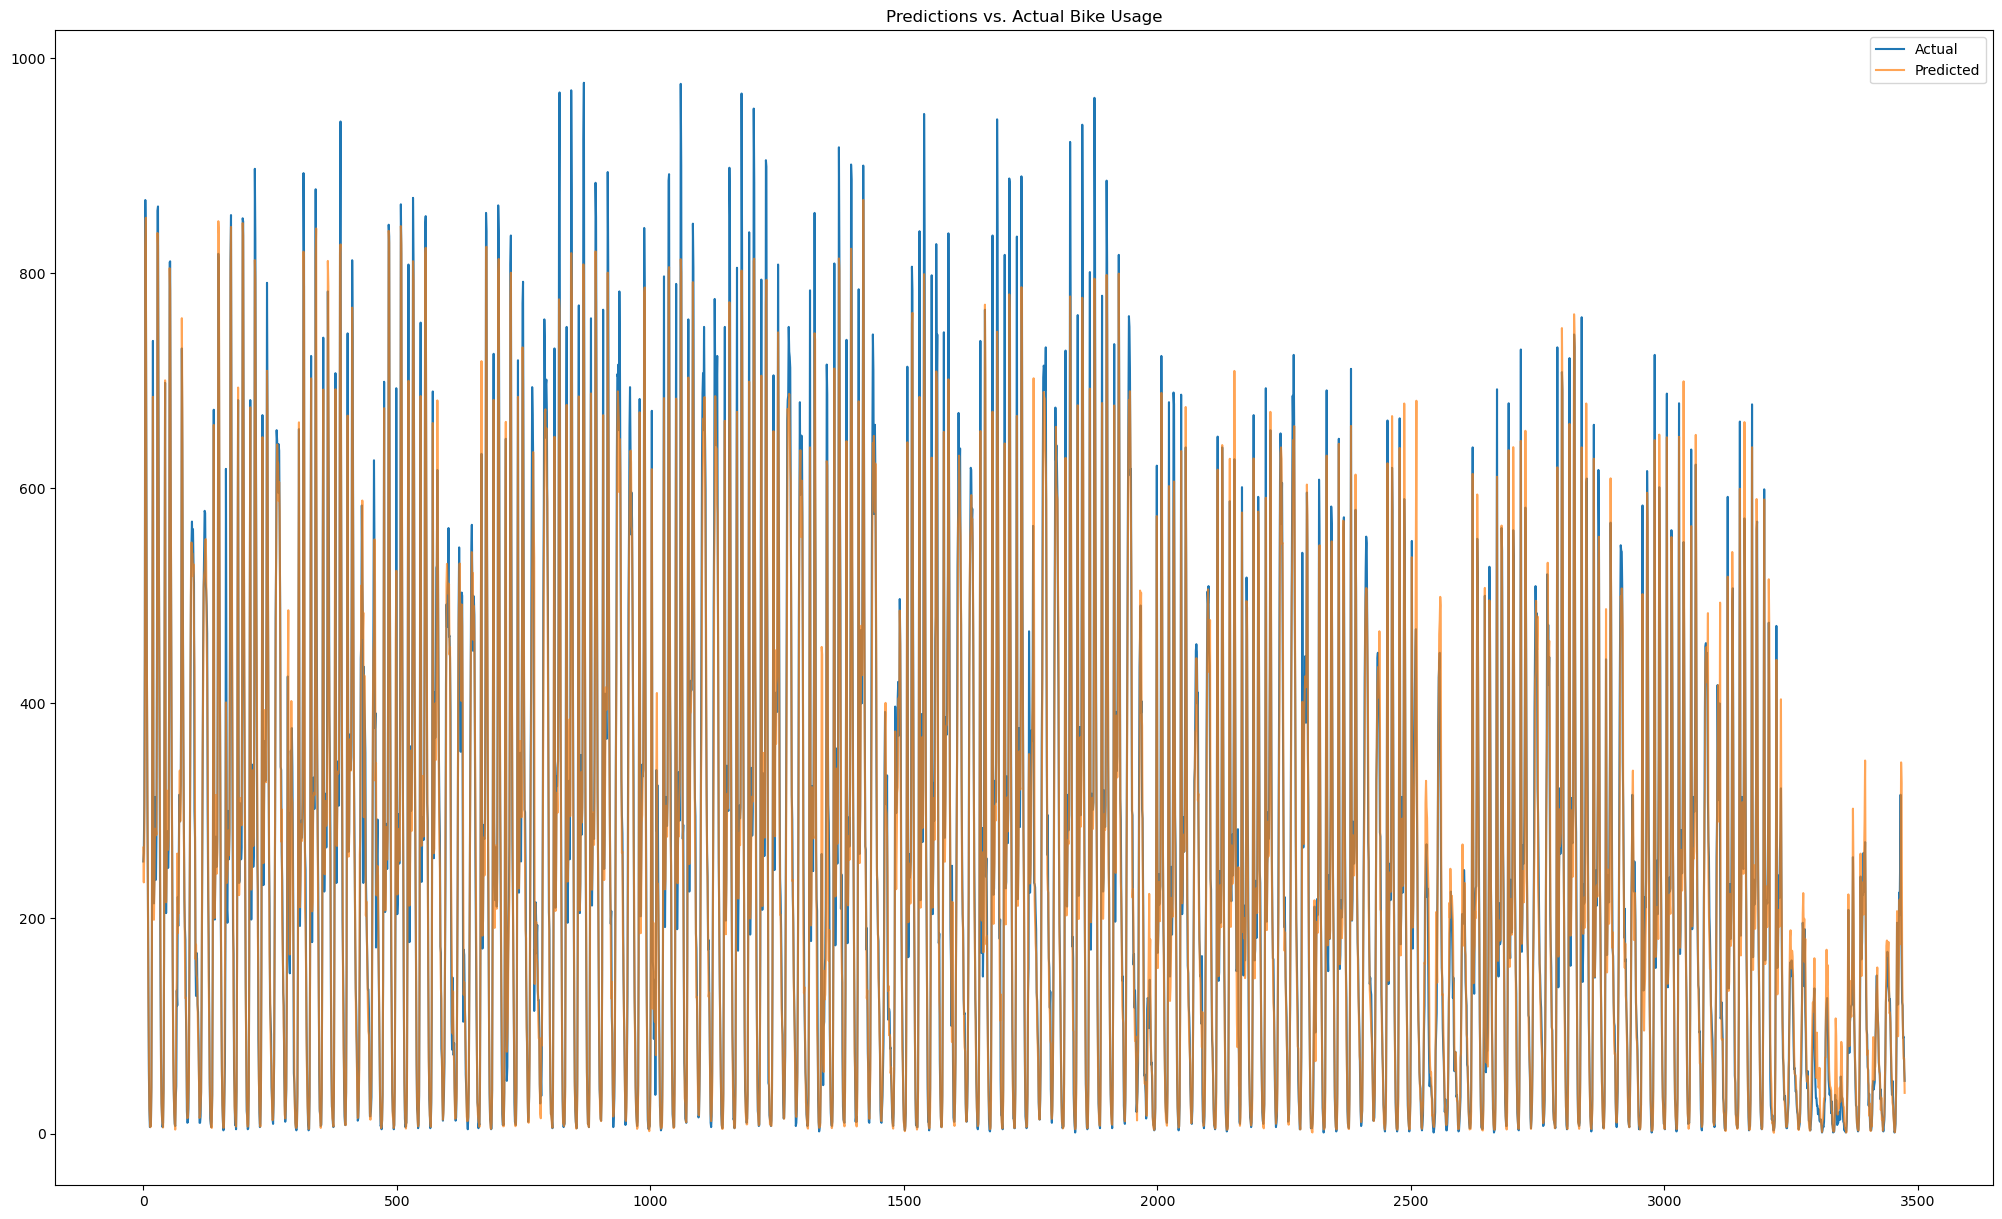

In [ ]:
# Carry out and evalute the XGBoost
X, y, X_train, X_test, y_train, y_test = train_test_split(variables, target, 0.2)
y_pred, xgb_model = optimized_xgboost(X_train, X_test, y_train)
eval_predictions(y_test, y_pred)


# We save the features list along the model
feature_names = X_train.columns.tolist()  # Save feature names from training data

# Save model and feature names together
with open("best_xgb_model.pkl", "wb") as f:
    pickle.dump({"model": xgb_model, "feature_names": feature_names}, f)

### Explanation of Model Decisions

1. **Model Choice (XGBoost)**: 
   - XGBoost is chosen for its effectiveness with structured data and its ability to capture complex relationships, making it well-suited for regression tasks like this one.

2. **Hyperparameter Tuning (RandomizedSearchCV)**: 
   - `RandomizedSearchCV` is used instead of a full grid search to improve efficiency, exploring 50 parameter combinations across 4 time series splits. This balances thoroughness with computational speed.

3. **Cross-Validation (TimeSeriesSplit)**:
   - `TimeSeriesSplit` is selected to avoid data leakage by preserving the time order of data, which is crucial for time series analysis. This method respects temporal dependencies, unlike standard K-Fold cross-validation.

4. **Evaluation Metrics (MAE & RMSE)**:
   - **MAE** (Mean Absolute Error) provides the average error, while **RMSE** (Root Mean Squared Error) penalizes larger errors. Both metrics together give a comprehensive view of model performance, with RMSE adding weight to larger errors.

5. **Best Parameters**:
   - The optimal parameters found (e.g., low learning rate, high number of estimators) suggest a model setup that balances complexity and regularization, allowing the model to capture data patterns without overfitting.

6. **Feature Importances**:
   - Features like `AR_1`, `MA_1`, and `is_peak_hour` have the highest importance, highlighting the most impactful predictors. This insight is useful for understanding key drivers in the model.

7. **Prediction**:
   - Final predictions are generated with the optimized model, making the model ready for further analysis or deployment.

This approach effectively addresses the requirements of a time series regression task, balancing accuracy with interpretability.


# Analysis and Insights

## Linear Regression Model

Results: MAE = 54.94, RMSE = 80.00. The high error shows that a simple linear model can’t capture the complex, cyclic patterns in the data.
Conclusion: Serves as a basic baseline, but lacks the sophistication needed for time-dependent data.

## XGBoost Model without Cyclicality and ARIMA Parameters

Results: Improved performance with MAE = 40.84, RMSE = 62.71.
Feature Importances: Key features include time-of-day and workday indicators, suggesting time dependence.
Conclusion: Captures some patterns but lacks explicit seasonality and autocorrelation handling.

## XGBoost Model with Cyclicality and ARIMA Parameters

Results: Best performance, MAE = 26.93, RMSE = 43.19.
Feature Importances: Key features include lagged terms, moving averages, and Fourier-based cyclic components.
Conclusion: Adding lagged, cyclic, and moving average features allowed the model to fully capture seasonal and autocorrelated patterns.

## Summary
Using cyclic transformations and ARIMA-inspired features significantly improves the model's ability to capture the time series structure, making the third XGBoost model the best approach for this data.

## Prediction vs. Actual graph:

Overall Pattern: The model captures the overall seasonal and daily fluctuations in bike usage quite well. The peaks and troughs of the predictions closely follow the actual values, indicating that the model is effectively accounting for cyclic patterns in bike demand.

Cyclic Trends: The graph shows a clear alignment between predicted and actual values in repeating daily and weekly cycles. This alignment reflects the impact of incorporating Fourier-based cyclical features and lagged values from the SARIMA-inspired configuration (e.g., hourly and multi-hour cyclic terms).

Peaks and Valleys: During high-demand periods, the predicted values are very close to the actual values, especially in peak hours. This suggests that the model can accurately forecast busy times, which are critical for the transportation department's planning.

Prediction Deviations: While the model tracks trends well, there are slight deviations in some high-fluctuation periods. This is common in time series with irregular, high peaks, where factors not captured by cyclic or lagged features might influence demand.

Error Reduction: Compared to the linear model and the XGBoost model without cyclic and lagged features, the residual errors are significantly reduced, as indicated by the tighter clustering of predictions around the actual values.

Overall, the graph visually confirms the improved performance of this model, especially in capturing complex, repeating patterns in bike demand, which directly contributes to its lower MAE and RMSE. This strong alignment in the graph demonstrates that the chosen cyclical and lagged features are highly relevant for this problem.

## PART III: Streamlit dashboard

In [ ]:
## Input the following into your console

"""



streamlit run bike_sharing_app.py



"""

'\n\n\n\nstreamlit run bike_sharing_app.py\n\n\n\n'